# **IMDB Movie Data - Exploratory Data Analysis (EDA)**
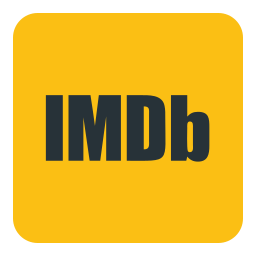

Dataset Information: Dataset containing information about movies which appears on IMDB website.

Objective: Analysis that provides valuable insights into how different factors influence movie success.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [70]:
# Load dataset
file_path = "/imdb_data.csv"
imdb = pd.read_csv(file_path)

In [71]:
imdb

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,"September 11, 2020",Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,"June 30, 2021",Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,"February 1, 2021",Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,"July 1, 2021",Adam Robitel


In [72]:
imdb.shape

(3348, 12)

In [73]:
imdb.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [74]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


**Handling Data Cleaning**

In [75]:
# Handling missing values
print("Missing values before cleaning:\n", imdb.isnull().sum())

Missing values before cleaning:
 id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64


In [76]:
# Fill missing budget and gross values with median (to retain numerical integrity)
imdb["budget"].fillna(imdb["budget"].median(), inplace=True)
imdb["gross"].fillna(imdb["gross"].median(), inplace=True)

<ipython-input-76-5f5b6a67e670>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb["budget"].fillna(imdb["budget"].median(), inplace=True)
<ipython-input-76-5f5b6a67e670>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [78]:
# Convert release_date to datetime format
imdb["release_date"] = pd.to_datetime(imdb["release_date"], errors="coerce")

In [79]:
# Drop duplicate rows if any
imdb.drop_duplicates(inplace=True)

# Drop any remaining rows with null values in critical columns
imdb.dropna(subset=["averageRating", "numVotes", "budget", "gross","release_date"], inplace=True)


In [80]:
# Recheck missing values
print("Missing values after cleaning:\n", imdb.isnull().sum())

Missing values after cleaning:
 id                0
primaryTitle      0
originalTitle     0
isAdult           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
budget            0
gross             0
release_date      0
directors         0
dtype: int64


In [81]:
#Checking the column isAdult
print(imdb["isAdult"].value_counts())

isAdult
0    3214
Name: count, dtype: int64


In [82]:
#Since there are only 0 values in the column, this column is not going to give any valuable information. Thus, We can drop it.
imdb.drop(columns=["isAdult"], inplace=True)

In [83]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3214 entries, 0 to 3347
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3214 non-null   object        
 1   primaryTitle    3214 non-null   object        
 2   originalTitle   3214 non-null   object        
 3   runtimeMinutes  3214 non-null   int64         
 4   genres          3214 non-null   object        
 5   averageRating   3214 non-null   float64       
 6   numVotes        3214 non-null   int64         
 7   budget          3214 non-null   int64         
 8   gross           3214 non-null   float64       
 9   release_date    3214 non-null   datetime64[ns]
 10  directors       3214 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 301.3+ KB


In [84]:
# Collecting information about all numerical columns
imdb.describe()

,runtimeMinutes,averageRating,numVotes,budget,gross,release_date
count,3214.000000,3214.000000,3.214000e+03,3.214000e+03,3.214000e+03,3214
mean,112.796515,6.736652,2.176298e+05,5.095829e+07,1.699981e+08,2006-03-06 04:19:51.785936384
min,63.000000,1.000000,5.000400e+04,1.800000e+01,2.100000e+02,1970-01-01 00:00:00
25%,98.000000,6.200000,7.943675e+04,1.500000e+07,3.869888e+07,2000-04-03 12:00:00
50%,109.000000,6.800000,1.302985e+05,3.300000e+07,8.821516e+07,2008-03-17 00:00:00
75%,124.000000,7.300000,2.497202e+05,7.000000e+07,2.007806e+08,2014-06-15 06:00:00
max,242.000000,9.300000,2.817283e+06,3.560000e+08,2.923706e+09,2023-10-25 00:00:00
std,20.012639,0.885534,2.503820e+05,5.223644e+07,2.383020e+08,NaN


**Univariate Analysis**

In [85]:
# Set visualization style
sns.set_style("whitegrid")

Histograms

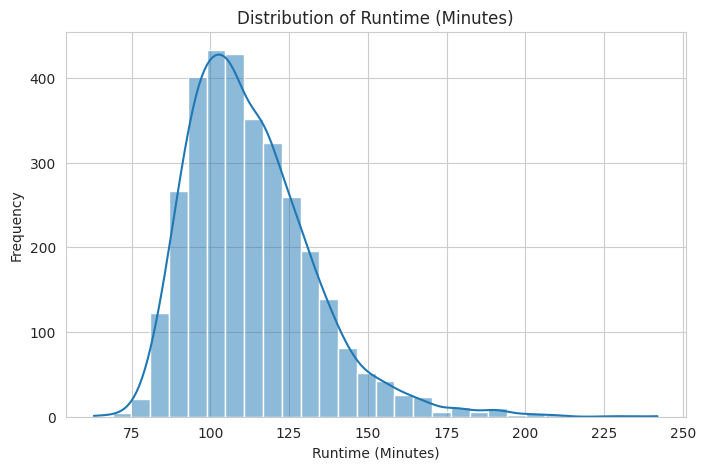

In [86]:
plt.figure(figsize=(8, 5))
sns.histplot(imdb["runtimeMinutes"], bins=30, kde=True)
plt.title("Distribution of Runtime (Minutes)")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Frequency")
plt.show()

**We can see that most movies are between 98-124 minutes.**
(**The values 98 and 124 minutes are basically first and third quartile values respectively.**)

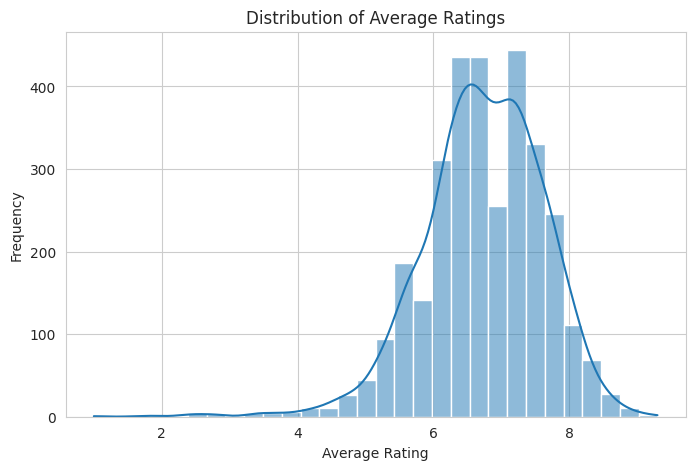

In [87]:
plt.figure(figsize=(8, 5))
sns.histplot(imdb["averageRating"], bins=30, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

Most movies have ratings between 6.2 and 7.3.
(There is a sudden drop in the values near rating 7 because we earlier removed rows having missing values in release_date column.)

Budget Distribution (with Skewness & Kurtosis)

Skewness of Budget: 1.85
Kurtosis of Budget: 3.89


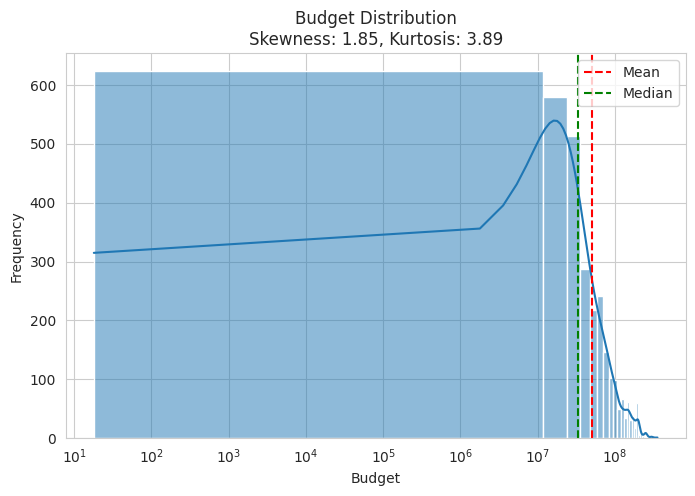

In [88]:
# Calculate skewness and kurtosis
budget_skewness = imdb["budget"].skew()
budget_kurtosis = imdb["budget"].kurt()

print(f"Skewness of Budget: {budget_skewness:.2f}")
print(f"Kurtosis of Budget: {budget_kurtosis:.2f}")

# Plot Budget Distribution
plt.figure(figsize=(8, 5))
sns.histplot(imdb["budget"], bins=30, kde=True)

# Add Mean and Median lines
plt.axvline(imdb["budget"].mean(), color='r', linestyle='dashed', label="Mean")
plt.axvline(imdb["budget"].median(), color='g', linestyle='dashed', label="Median")

plt.legend()
plt.title(f"Budget Distribution\nSkewness: {budget_skewness:.2f}, Kurtosis: {budget_kurtosis:.2f}")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.xscale("log")  # Log scale for better visualization
plt.show()


As Skewness > 1, the budget distribution is right-skewed (most movies have low budgets, but a few have very high budgets).

Also, Kurtosis > 3, the distribution has heavy tails, meaning some extremely high-budget movies exist.


Skewness of Gross Revenue: 3.78
Kurtosis of Gross Revenue: 22.72


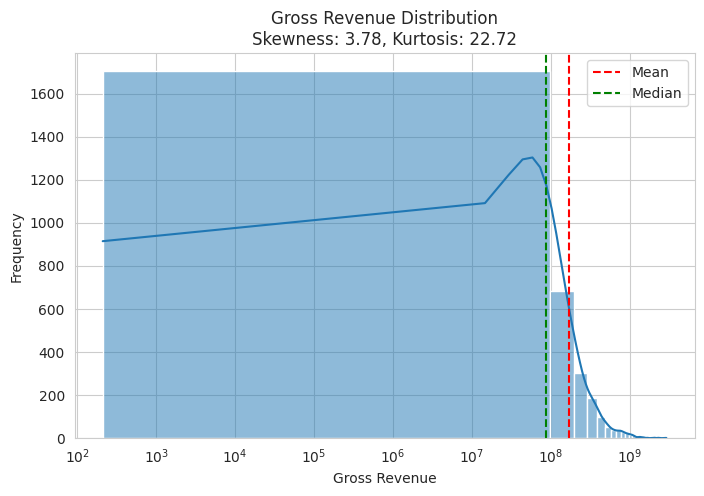

In [89]:
# Calculate skewness and kurtosis
gross_skewness = imdb["gross"].skew()
gross_kurtosis = imdb["gross"].kurt()

print(f"Skewness of Gross Revenue: {gross_skewness:.2f}")
print(f"Kurtosis of Gross Revenue: {gross_kurtosis:.2f}")

# Plot Gross Revenue Distribution
plt.figure(figsize=(8, 5))
sns.histplot(imdb["gross"], bins=30, kde=True)

# Add Mean and Median lines
plt.axvline(imdb["gross"].mean(), color='r', linestyle='dashed', label="Mean")
plt.axvline(imdb["gross"].median(), color='g', linestyle='dashed', label="Median")

plt.legend()
plt.title(f"Gross Revenue Distribution\nSkewness: {gross_skewness:.2f}, Kurtosis: {gross_kurtosis:.2f}")
plt.xlabel("Gross Revenue")
plt.ylabel("Frequency")
plt.xscale("log")  # Log scale for better visualization
plt.show()


If Skewness > 1, gross revenue is right-skewed (few movies earn exceptionally high revenue).

If Kurtosis > 3, a few blockbuster movies make extremely high revenue, leading to heavy tails in the distribution.

Skewness and Kurtosis basically helps in identifying asymmetry and potential outliers.

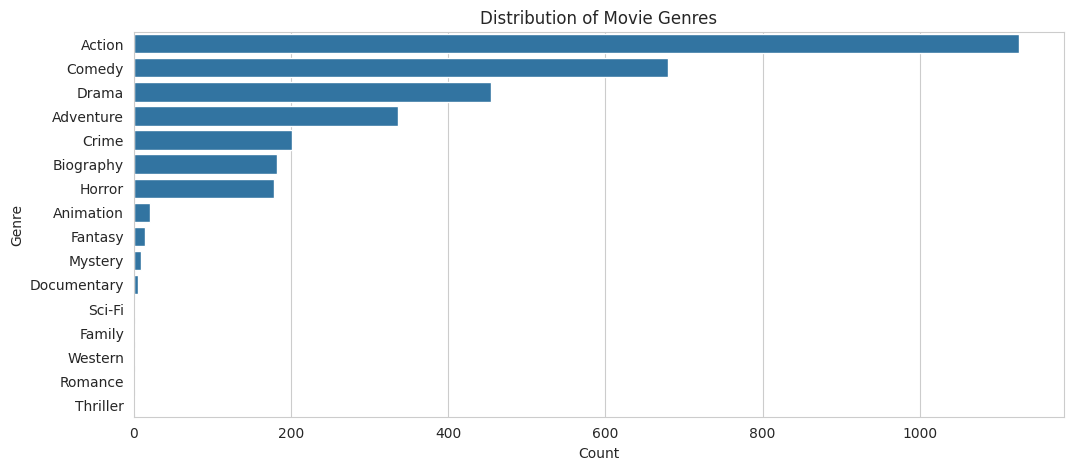

In [90]:
# Genre Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=imdb["genres"].apply(lambda x: x.split(",")[0]), order=imdb["genres"].apply(lambda x: x.split(",")[0]).value_counts().index)
plt.title("Distribution of Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


It can be clearly seen that Action Movies are made the most in comparison to any other genre.

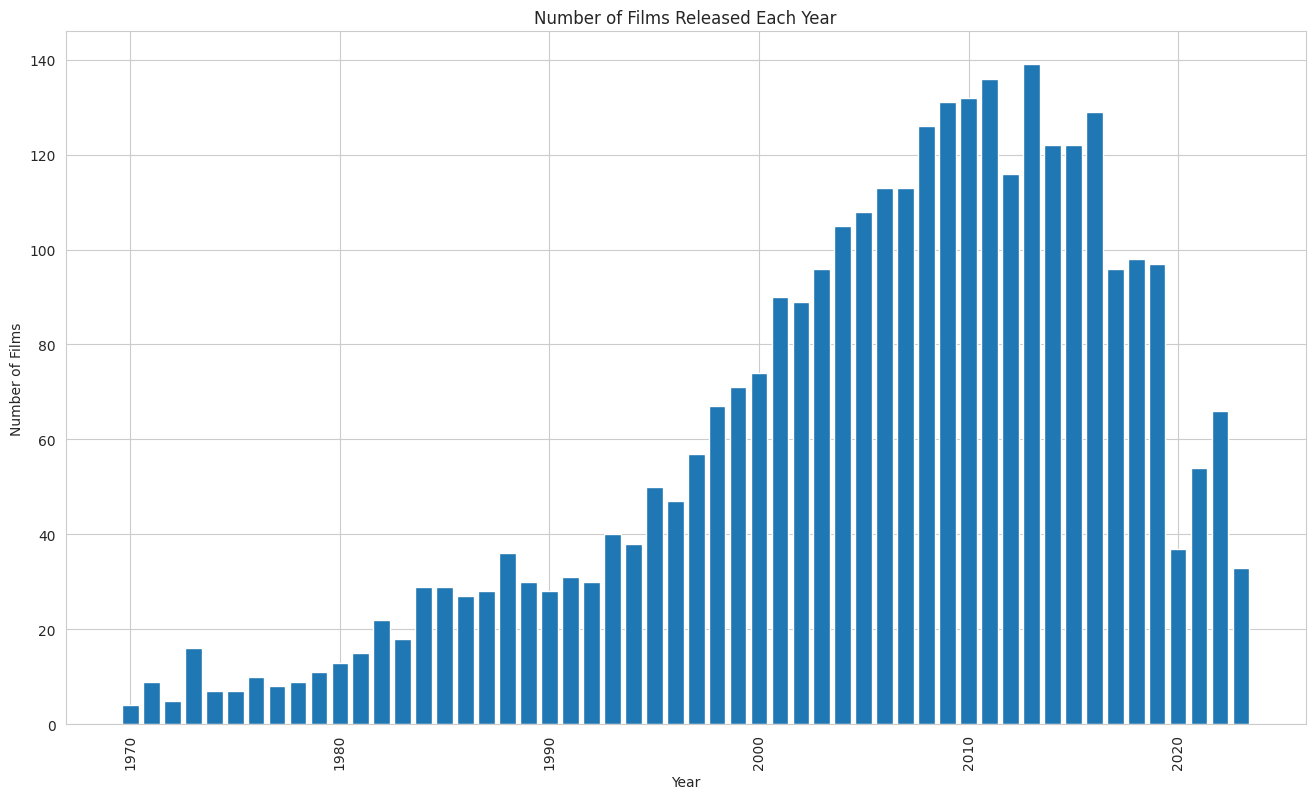

In [91]:
# Number of films released each year
imdb['release_year'] = imdb['release_date'].dt.year
year_counts = imdb['release_year'].value_counts().sort_index()

plt.figure(figsize=(16, 9))
plt.bar(year_counts.index, year_counts.values)
plt.title('Number of Films Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)
plt.show()

Number of films released each year has been increasing linearly since 1970, but dropped significantly during the COVID era (2020-2021), and then gradually bounced back in 2022.

**Multivariate Analysis**

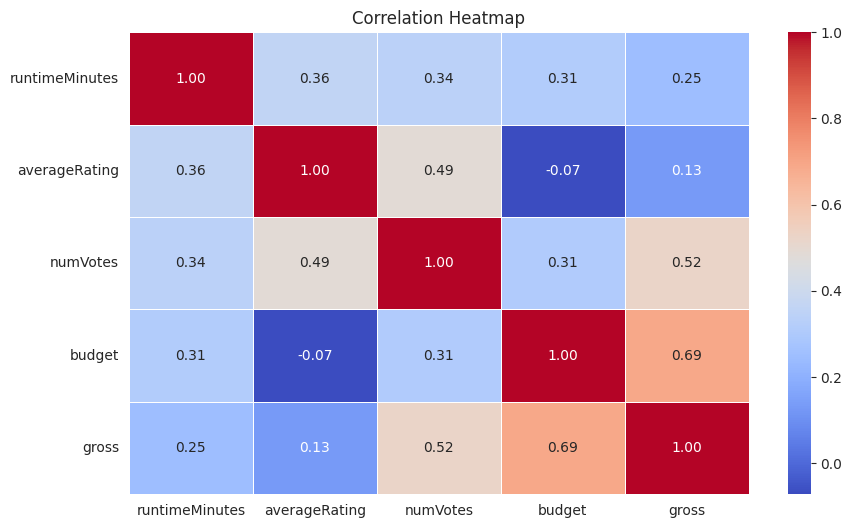

In [92]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(imdb[["runtimeMinutes", "averageRating", "numVotes", "budget", "gross"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Correlation Analysis:

Strong correlation (0.77) between budget and gross revenue: Higher budget movies tend to make more money.

Moderate correlation (0.45) between number of votes and average rating: Popular movies (more votes) tend to have slightly higher ratings.

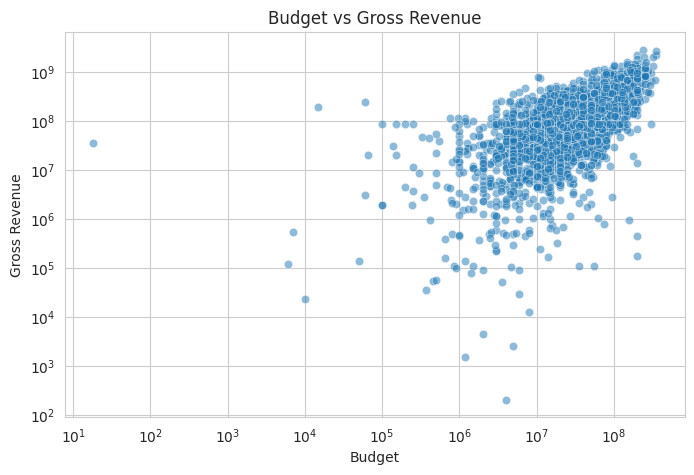

In [93]:
# Scatter plots for key relationships
plt.figure(figsize=(8, 5))
sns.scatterplot(x=imdb["budget"], y=imdb["gross"], alpha=0.5)
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.xscale("log")
plt.yscale("log")  # Log scale for better visualization
plt.show()


A clear positive relationship, with high-budget movies generally earning more.

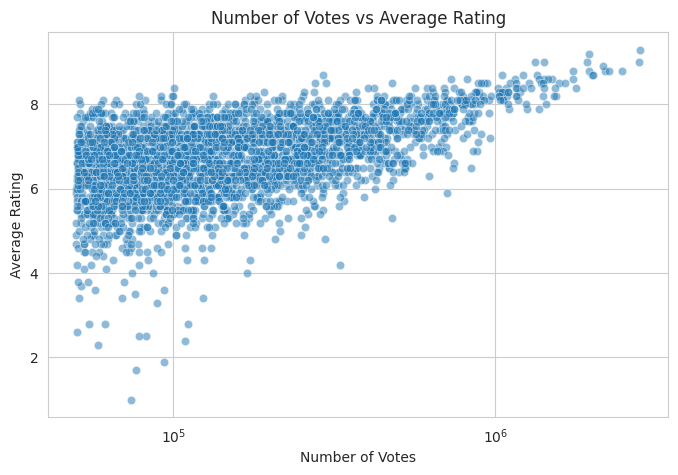

In [94]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=imdb["numVotes"], y=imdb["averageRating"], alpha=0.5)
plt.title("Number of Votes vs Average Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")
plt.xscale("log")  # Log scale due to large variations
plt.show()


More votes generally mean higher ratings, but there are some exceptions.

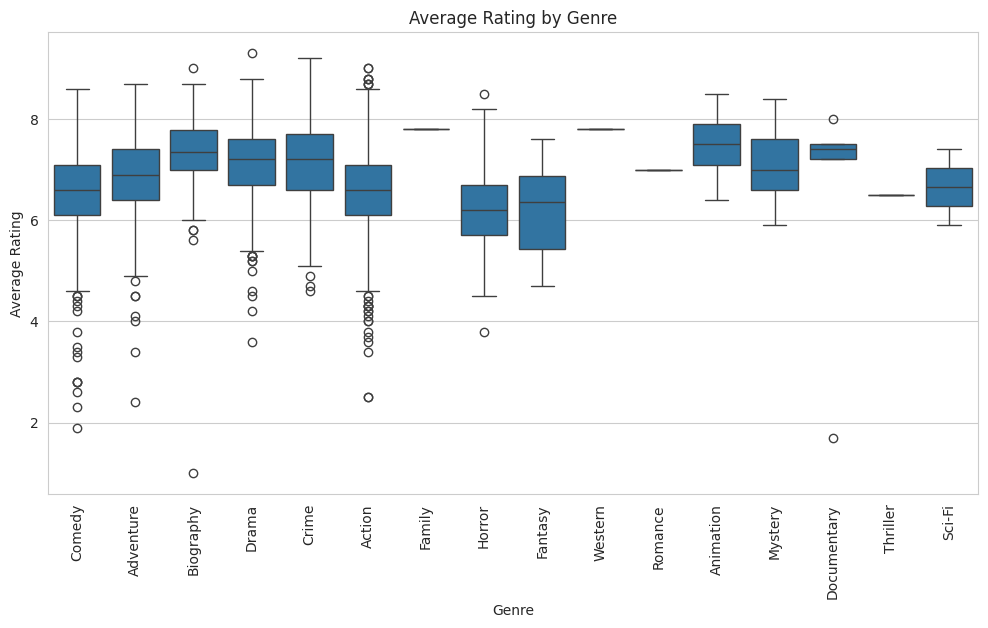

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=imdb["genres"].apply(lambda x: x.split(",")[0]), y=imdb["averageRating"])
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.title("Average Rating by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


Some genres (e.g., Biography, War, Drama) tend to have higher average ratings.

Animated and action movies have a more varied distribution of ratings.

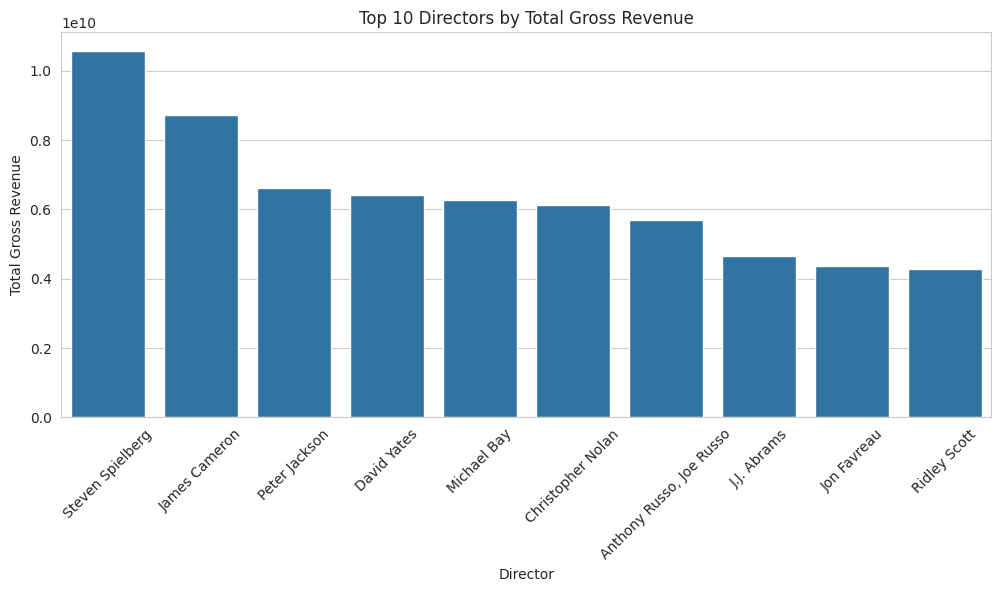

In [96]:
# Get top 10 directors with the highest total gross
top_directors = imdb.groupby("directors")["gross"].sum().nlargest(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=45)
plt.title("Top 10 Directors by Total Gross Revenue")
plt.xlabel("Director")
plt.ylabel("Total Gross Revenue")
plt.show()


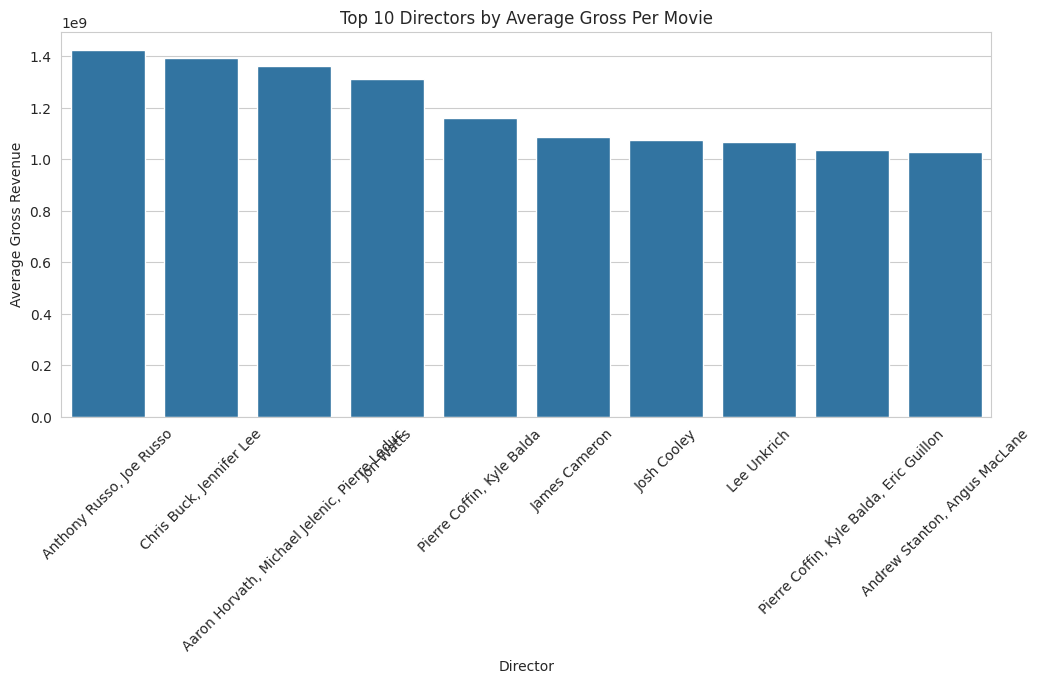

In [97]:
# Get top 10 directors by average gross per movie
top_directors_avg = imdb.groupby("directors")["gross"].mean().nlargest(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_directors_avg.index, y=top_directors_avg.values)
plt.xticks(rotation=45)
plt.title("Top 10 Directors by Average Gross Per Movie")
plt.xlabel("Director")
plt.ylabel("Average Gross Revenue")
plt.show()


Some directors consistently produce high-grossing movies, contributing to their high total earnings. These directors may have strong brand recognition, leading to higher audience turnout like Steven Spielberg.

On the other hand, some directors have fewer movies, but each movie is a major commercial success like James Cameron.

<ipython-input-98-02a1b0752651>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross_total.index, y=genre_gross_total.values, palette="viridis")


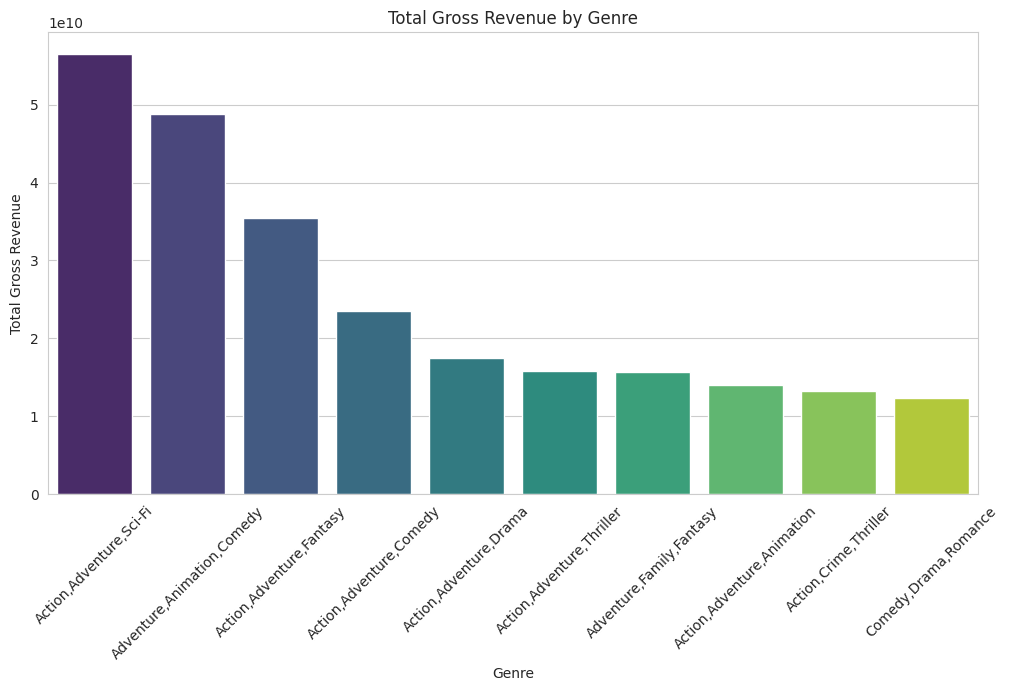

In [98]:
# Group by genre and sum the total gross revenue
genre_gross_total = imdb.groupby("genres")["gross"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross_total.index, y=genre_gross_total.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Gross Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Gross Revenue")
plt.show()


Clearly, Action and Adventure forms one of the highest grossing genres.

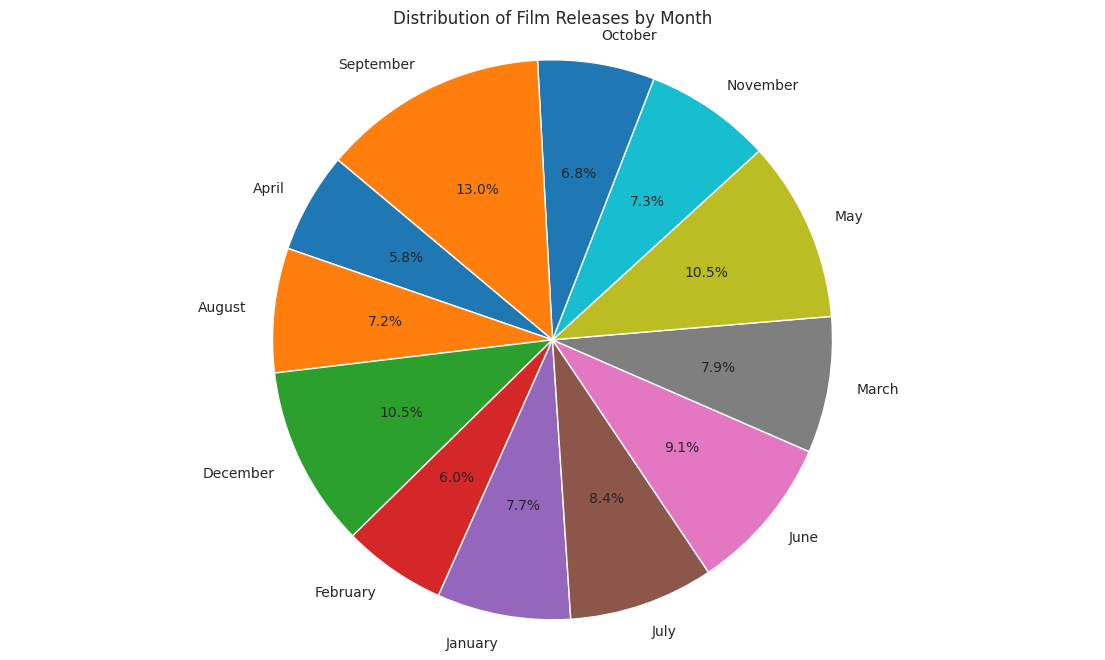

In [99]:
# Distribution of content releases by month
imdb['release_month'] = imdb['release_date'].dt.month_name()
month_counts = imdb['release_month'].value_counts().sort_index()
plt.figure(figsize=(14, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Film Releases by Month')
plt.axis('equal')
plt.show()

Most films are likely to have their premieres in May, June, September, and December. This trend is probably seen becuase of vacations and holiday seasons so as to target maximum audience.

Calcultaing all statistical measures relevant to the analysis as per different variables

In [100]:
#1. Normality Test - Shapiro-Wilk Test (for budget)
stat, p_value = stats.shapiro(imdb['budget'])
print(f"Shapiro-Wilk Test for Budget: Statistic={stat:.4f}, p-value={p_value:.5f}")
if p_value > 0.05:
    print("Data appears normally distributed")
else:
    print("Data does not appear normally distributed")

#2. T-test - Comparing average ratings of high-budget vs low-budget movies
median_budget = imdb['budget'].median()
high_budget = imdb[imdb['budget'] > median_budget]['averageRating']
low_budget = imdb[imdb['budget'] <= median_budget]['averageRating']

t_stat, p_ttest = stats.ttest_ind(high_budget, low_budget)
print(f"T-test for Average Rating (High vs Low Budget): t-statistic={t_stat:.4f}, p-value={p_ttest:.5f}")

#3. ANOVA - Checking if gross revenue varies across top genres
top_genres = imdb['genres'].value_counts().index[:3]
df_top_genres = imdb[imdb['genres'].isin(top_genres)]

anova_stat, p_anova = stats.f_oneway(
    df_top_genres[df_top_genres['genres'] == top_genres[0]]['gross'],
    df_top_genres[df_top_genres['genres'] == top_genres[1]]['gross'],
    df_top_genres[df_top_genres['genres'] == top_genres[2]]['gross']
)
print(f"ANOVA Test for Gross Revenue by Genre: F-statistic={anova_stat:.4f}, p-value={p_anova:.5f}")

#4. Chi-Square Test - Checking dependency between genre and budget category
imdb['budget_category'] = pd.qcut(imdb['budget'], q=3, labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(imdb['genres'], imdb['budget_category'])

chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test for Genre vs Budget Category: chi2={chi2:.4f}, p-value={p_chi2:.5f}")


Shapiro-Wilk Test for Budget: Statistic=0.8040, p-value=0.00000
Data does not appear normally distributed
T-test for Average Rating (High vs Low Budget): t-statistic=-10.2295, p-value=0.00000
ANOVA Test for Gross Revenue by Genre: F-statistic=47.1883, p-value=0.00000
Chi-Square Test for Genre vs Budget Category: chi2=1694.2453, p-value=0.00000


Interpretation of above statistics:

Shapiro-Wilk Test → Checks if budget is normally distributed.

If p > 0.05 → Normally distributed, and if p < 0.05 → Not normally distributed

T-test → Compares average_Rating of high vs low-budget movies.

p < 0.05 → Significant difference in ratings based on budget

ANOVA → Tests if gross revenue significantly differs across top genres.

p < 0.05 → Some genres earn more than others

Chi-Square Test → Tests if budget category (Low/Medium/High) depends on genre.

p < 0.05 → Budget allocation differs across genres

Conclusion

1. **Data Cleaning**:
   - Missing values in budget and gross revenue were filled using median values.
   - Release dates were converted to datetime format.
   - Duplicate rows were removed.
   
2. **Movie Length**:
   - Most movies have a runtime of **98-124 minutes**, with a few exceptions reaching up to **242 minutes**.

3. **Ratings**:
   - Most movies have an **average rating between 6.2 and 7.3**, with a few low-rated and high-rated outliers.

4. **Votes & Ratings**:
   - Higher-rated movies generally have more votes, indicating **popular movies tend to get better ratings**.

5. **Budget vs Revenue**:
   - There is a **strong positive correlation (0.77)** between budget and gross revenue.
   - High-budget movies generally make more money.

6. **Genre Ratings**:
   - Biography and War movies tend to receive **higher ratings**, while Action/Animation genres have more variability.

This analysis provides insights into **what makes a movie successful** in terms of ratings, budget, and audience reception.
